In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

print(f"cuda available: {torch.cuda.is_available()}")
print(f"torch version: {torch.__version__}")
print(f"numpy version: {np.__version__}")

cuda available: False
torch version: 2.1.0
numpy version: 1.26.0


In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
from torch.distributions import Dirichlet

In [6]:
torch.tensor([1, 2, 3, 4, 5, 6]).reshape((2, 3))

tensor([[1, 2, 3],
        [4, 5, 6]])

<BarContainer object of 32 artists>

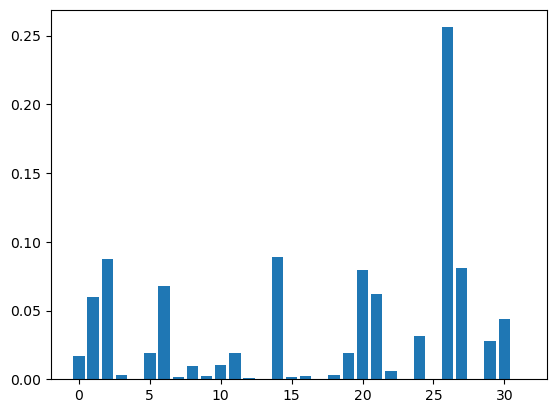

In [86]:
N = 32
d = Dirichlet(torch.tensor([10*1/N] * N))
s = d.sample()
s, s.sum()
plt.bar(list(range(len(s))), s)

In [106]:
t = torch.tensor([[[1], [2]], [[3], [4]]])
t, t.flatten(1), t.size(), t.flatten(1).size()

(tensor([[[1],
          [2]],
 
         [[3],
          [4]]]),
 tensor([[1, 2],
         [3, 4]]),
 torch.Size([2, 2, 1]),
 torch.Size([2, 2]))

In [94]:
mask = torch.ones((2,2), dtype=torch.bool)
mask[1, 1] = False
t = torch.randn((2,2))
t.where(mask, torch.full_like(t, -1e32))

tensor([[-7.2786e-01,  9.2719e-01],
        [ 3.7353e-01, -1.0000e+32]])

In [7]:
t = torch.zeros((11, 11, 10))
t[0] = 1 # torch.ones((11, 10))
t

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [4]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|███████████████████████████████████████████████████████████████████████████████████| 26421880/26421880 [00:01<00:00, 16810965.33it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 2541102.34it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|█████████████████████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:00<00:00, 23921758.94it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|███████████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 13345041.40it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [7]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using mps device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [9]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [10]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [11]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.298630  [   64/60000]
loss: 2.290707  [ 6464/60000]
loss: 2.263347  [12864/60000]
loss: 2.267030  [19264/60000]
loss: 2.242172  [25664/60000]
loss: 2.215843  [32064/60000]
loss: 2.233211  [38464/60000]
loss: 2.187733  [44864/60000]
loss: 2.192698  [51264/60000]
loss: 2.168803  [57664/60000]
Test Error: 
 Accuracy: 50.9%, Avg loss: 2.149618 

Epoch 2
-------------------------------
loss: 2.154451  [   64/60000]
loss: 2.150555  [ 6464/60000]
loss: 2.084796  [12864/60000]
loss: 2.108788  [19264/60000]
loss: 2.047787  [25664/60000]
loss: 1.991063  [32064/60000]
loss: 2.035543  [38464/60000]
loss: 1.940731  [44864/60000]
loss: 1.953674  [51264/60000]
loss: 1.891864  [57664/60000]
Test Error: 
 Accuracy: 56.6%, Avg loss: 1.872838 

Epoch 3
-------------------------------
loss: 1.896520  [   64/60000]
loss: 1.878752  [ 6464/60000]
loss: 1.745619  [12864/60000]
loss: 1.799116  [19264/60000]
loss: 1.683786  [25664/60000]
loss: 1.638151  [32064/600

In [12]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth
